## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


***All Imports**

In [48]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [49]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipyleaflet import Map, basemaps, Marker, AwesomeIcon

**Initializations**

In [50]:
help(pd.set_option)

Help on CallableDynamicDoc in module pandas._config.config:

<pandas._config.config.CallableDynamicDoc object>
    set_option(pat, value)
    
    Sets the value of the specified option.
    
    Available options:
    
    - compute.[use_bottleneck, use_numba, use_numexpr]
    - display.[chop_threshold, colheader_justify, date_dayfirst, date_yearfirst,
      encoding, expand_frame_repr, float_format]
    - display.html.[border, table_schema, use_mathjax]
    - display.[large_repr, max_categories, max_columns, max_colwidth, max_dir_items,
      max_info_columns, max_info_rows, max_rows, max_seq_items, memory_usage,
      min_rows, multi_sparse, notebook_repr_html, pprint_nest_depth, precision,
      show_dimensions]
    - display.unicode.[ambiguous_as_wide, east_asian_width]
    - display.[width]
    - io.excel.ods.[reader, writer]
    - io.excel.xls.[reader]
    - io.excel.xlsb.[reader]
    - io.excel.xlsm.[reader, writer]
    - io.excel.xlsx.[reader, writer]
    - io.hdf.[default_for

In [89]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

(★☆☆) Read the dataset assets/real_estate.csv and try to visualize the table 

In [52]:

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')


**EDA**

In [53]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [54]:
ds.head(5)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,0,0,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",España,Madrid,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,0,0,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,PISOS DE OBRA NUEVA DE 2 Y 3 DORMITORIOS. OBRA...,Arganda del Rey,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


In [55]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,15335.0,7.668000e+03,4.426978e+03,1.0,3834.5,7668.0,11501.5,15335.0
id_realEstates,15335.0,1.524371e+08,2.277286e+06,122158397.0,151945648.5,153241261.0,153810509.0,154003339.0
phone_realEstate,14541.0,9.143423e+08,7.516036e+06,876274236.0,911364937.0,912184058.0,914890357.0,988776128.0
rooms,14982.0,3.231611e+00,1.393106e+00,1.0,2.0,3.0,4.0,30.0
bathrooms,14990.0,2.150233e+00,1.292079e+00,1.0,1.0,2.0,3.0,20.0
surface,14085.0,1.969164e+02,2.182758e+03,15.0,80.0,114.0,205.0,249000.0
price,15335.0,4.773036e+05,5.912942e+05,0.0,169000.0,280000.0,540000.0,8500000.0
countryId,15335.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
level1Id,15335.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
level2Id,15335.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [56]:
ds.describe(include=['O']).T

,count,unique,top,freq
realEstate_name,15325,1821,engel volkers madrid,470
url_inmueble,15335,493,https://www.fotocasa.es/vivienda/arganda-del-r...,90
date,15335,4481,2019-12-19T07:00:00Z,137
description,15193,11966,Pisos de obra nueva en Madrid. Solvia cuenta c...,114
address,15335,5260,Madrid Capital,2788
country,15335,1,España,15335
level1,15335,1,Madrid,15335
level2,15335,1,Madrid,15335
level3,15335,7,"Madrid, Zona de",6643
level4,8692,77,"Alcalá de Henares, Zona de",525


In [57]:
ds.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,15335.0,7.668000e+03,4.426978e+03,1.0,3834.5,7668.0,11501.5,15335.0
id_realEstates,15335.0,1.524371e+08,2.277286e+06,122158397.0,151945648.5,153241261.0,153810509.0,154003339.0
phone_realEstate,14541.0,9.143423e+08,7.516036e+06,876274236.0,911364937.0,912184058.0,914890357.0,988776128.0
rooms,14982.0,3.231611e+00,1.393106e+00,1.0,2.0,3.0,4.0,30.0
bathrooms,14990.0,2.150233e+00,1.292079e+00,1.0,1.0,2.0,3.0,20.0
surface,14085.0,1.969164e+02,2.182758e+03,15.0,80.0,114.0,205.0,249000.0
price,15335.0,4.773036e+05,5.912942e+05,0.0,169000.0,280000.0,540000.0,8500000.0
countryId,15335.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
level1Id,15335.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
level2Id,15335.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [58]:
ds.shape

(15335, 37)

What is the most expensive home in the dataset? (★☆☆)

In [59]:
most_expensive = ds[ds["price"] == ds["price"].max()]
most_expensive_id = most_expensive['id_realEstates'].values[0]
most_expensive_price = most_expensive['price'].values[0]

most_expensive_price_formatted = f'€{most_expensive_price:,}'  


print("The Most Expensive Home details:")
print(f"id_realEstates: {most_expensive_id}")
print(f"Price: {most_expensive_price_formatted}")

The Most Expensive Home details:
id_realEstates: 132042636
Price: €8,500,000


What is cheapest home in the dataset?  (★☆☆)

In [60]:
valid_entries = ds[ds["price"] > 0]

cheapest = valid_entries[valid_entries["price"] == valid_entries["price"].min()]
cheapest_id = cheapest['id_realEstates'].values[0]
cheapest_price = cheapest['price'].values[0]

cheapest_price_formatted = f'€{cheapest_price:,}'  


print("Cheapest Home details:")
print(f"id_realEstates {cheapest_id}")
print(f"Price: {cheapest_price_formatted}")

Cheapest Home details:
id_realEstates 153977752
Price: €600


#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [62]:
valid_entries = ds[ds["surface"] > 0]


largest_home = valid_entries[valid_entries["surface"] == valid_entries["surface"].max()]
smallest_home = valid_entries[valid_entries["surface"] == valid_entries["surface"].min()]


largest_id = largest_home['id_realEstates'].values[0]
largest_surface = largest_home['surface'].values[0]


smallest_id = smallest_home['id_realEstates'].values[0]
smallest_surface = smallest_home['surface'].values[0]


print("Largest Home details:")
print(f"ID: {largest_id}")
print(f"Surface: {largest_surface} sqm")

print("\nSmallest Home details:")
print(f"id_realEstates: {smallest_id}")
print(f"Surface: {smallest_surface} sqm")

Largest Home details:
ID: 153936192
Surface: 249000.0 sqm

Smallest Home details:
id_realEstates: 152817874
Surface: 15.0 sqm


#### How many populations (level5) the dataset contains? (★☆☆)

In [63]:
number_population = ds['level5'].nunique()

print("How many populations (level5) the dataset contains:", number_population)


How many populations (level5) the dataset contains: 168


#### Does the dataset contain NAs? (★☆☆)


In [64]:
missing_values = ds.isna().sum()

print("Missing values in the dataset:")
print(missing_values)

total_missing_values = ds.isna().sum().sum()
print("\nYes, contain this number of NAs:", total_missing_values)

Missing values in the dataset:
Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: 

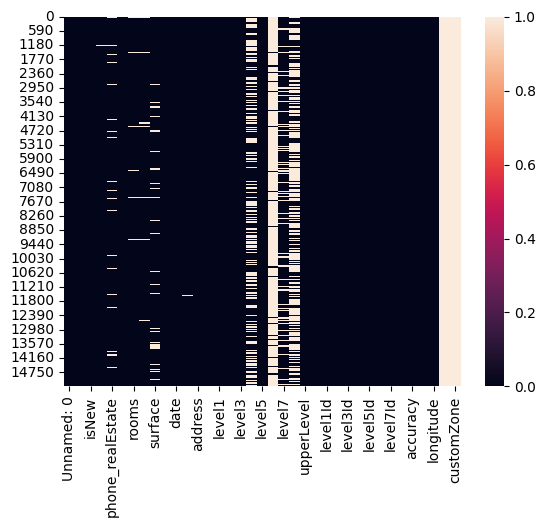

In [65]:
sns.heatmap(ds.isnull())
plt.show()

#### Delete the NAs of the dataset, if applicable (★★☆)

In [66]:
ds_cleaned = ds.dropna()

print("Clean Dataset after removing NAs:")
print(ds_cleaned)

Clean Dataset after removing NAs:
Empty DataFrame
Columns: [Unnamed: 0, id_realEstates, isNew, realEstate_name, phone_realEstate, url_inmueble, rooms, bathrooms, surface, price, date, description, address, country, level1, level2, level3, level4, level5, level6, level7, level8, upperLevel, countryId, level1Id, level2Id, level3Id, level4Id, level5Id, level6Id, level7Id, level8Id, accuracy, latitude, longitude, zipCode, customZone]
Index: []


What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"#### ? (★★☆)

In [67]:
population = "Arroyomolinos (Madrid)"
filtered_data = ds[ds["level5"] == population]
mean_price = filtered_data["price"].mean()


mean_price_formatted = f'{mean_price:.2f}€'

print("Mean price in:", population, ":", mean_price_formatted)


Mean price in: Arroyomolinos (Madrid) : 294541.60€


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

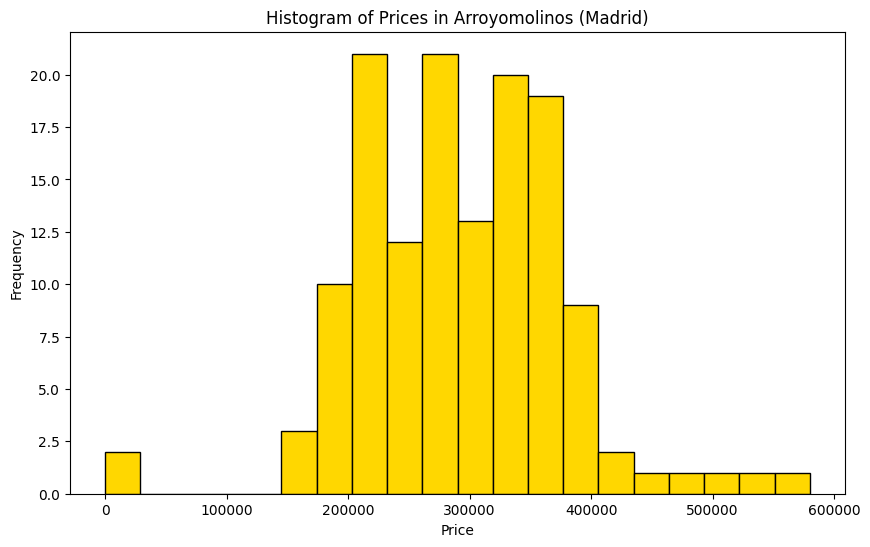

The histogram of prices in Arroyomolinos shows the distribution of property prices in the area.
From the plot, we can observe that the majority of properties are concentrated in the lower price range(200,000 - 300,000€),
indicating that Arroyomolinos has a higher frequency of affordable properties.


In [91]:
population = "Arroyomolinos (Madrid)"
filtered_data = ds[ds["level5"] == population]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data["price"], bins=20, color='gold', edgecolor='black')
plt.title("Histogram of Prices in " + population)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

print("The histogram of prices in Arroyomolinos shows the distribution of property prices in the area.\n"
      "From the plot, we can observe that the majority of properties are concentrated in the lower price range(200,000 - 300,000€),\n"
      "indicating that Arroyomolinos has a higher frequency of affordable properties.")


#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [85]:
south_belt_populations = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

sb_subset = ds[ds["level5"].isin(south_belt_populations)] #data filtered ds



#### Make a bar plot of the median of prices (★★★) 

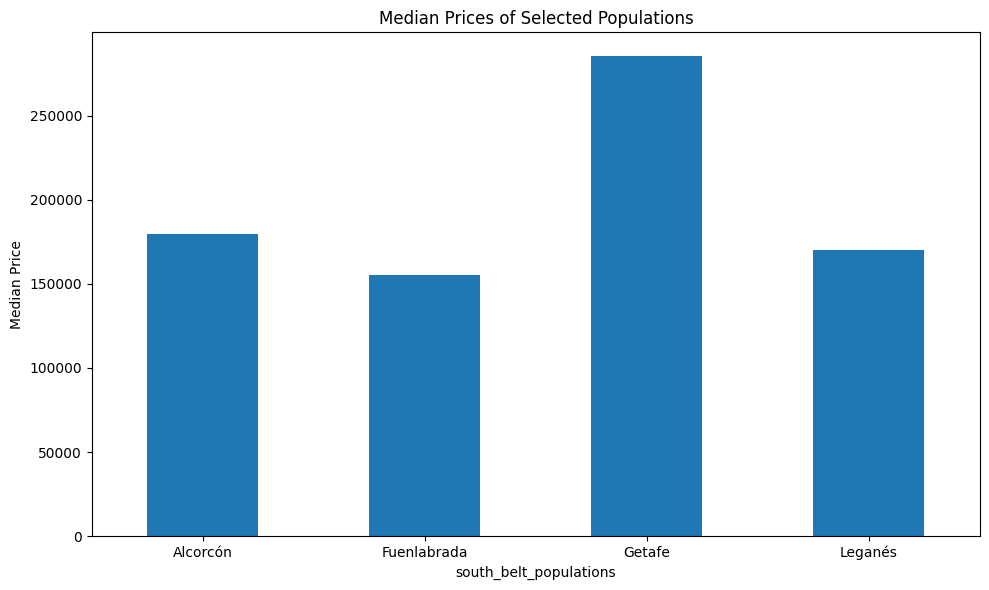

In [70]:
median_prices = sb_subset.groupby("level5")["price"].median()
plt.figure(figsize=(10, 6))
median_prices.plot(kind="bar")
plt.title("Median Prices of Selected Populations")
plt.xlabel("south_belt_populations")
plt.ylabel("Median Price")
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()


###Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [71]:
median_prices = sb_subset.groupby("level5")["price"].median()

mean_price = sb_subset["price"].mean()
variance_price = sb_subset["price"].var()

mean_rooms = sb_subset["rooms"].mean()
variance_rooms = sb_subset["rooms"].var()

mean_surface = sb_subset["surface"].mean()
variance_surface = sb_subset["surface"].var()

mean_bathrooms = sb_subset["bathrooms"].mean()
variance_bathrooms = sb_subset["bathrooms"].var()


print("Sample Mean and Variance for Selected Populations:")
print("Price: Mean =", mean_price, "Variance =", variance_price)
print("Rooms: Mean =", mean_rooms, "Variance =", variance_rooms)
print("Surface: Mean =", mean_surface, "Variance =", variance_surface)
print("Bathrooms: Mean =", mean_bathrooms, "Variance =", variance_bathrooms)


Sample Mean and Variance for Selected Populations:
Price: Mean = 223094.48070562293 Variance = 14921367508.04902
Rooms: Mean = 3.0177383592017737 Variance = 0.7188858892927542
Surface: Mean = 111.75222363405337 Variance = 4263.051760316337
Bathrooms: Mean = 1.633221850613155 Variance = 0.5717968625577321


#### What is the most expensive home of each population? (★★☆) 

In [72]:

max_prices_idx = sb_subset.groupby("level5")["price"].idxmax()
most_expensive_homes = sb_subset.loc[max_prices_idx, ["level5", "id_realEstates", "price"]]



for _, row in most_expensive_homes.iterrows():
    print(f"{row['level5']}: House ID {row['id_realEstates']}, Price: {row['price']:.2f}€")


Alcorcón: House ID 153275915, Price: 950000.00€
Fuenlabrada: House ID 153660921, Price: 490000.00€
Getafe: House ID 151105544, Price: 1050000.00€
Leganés: House ID 152251506, Price: 650000.00€


#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

/tmp/ipykernel_689/2639728758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_subset["normalized_price"] = sb_subset.groupby("level5")["price"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))


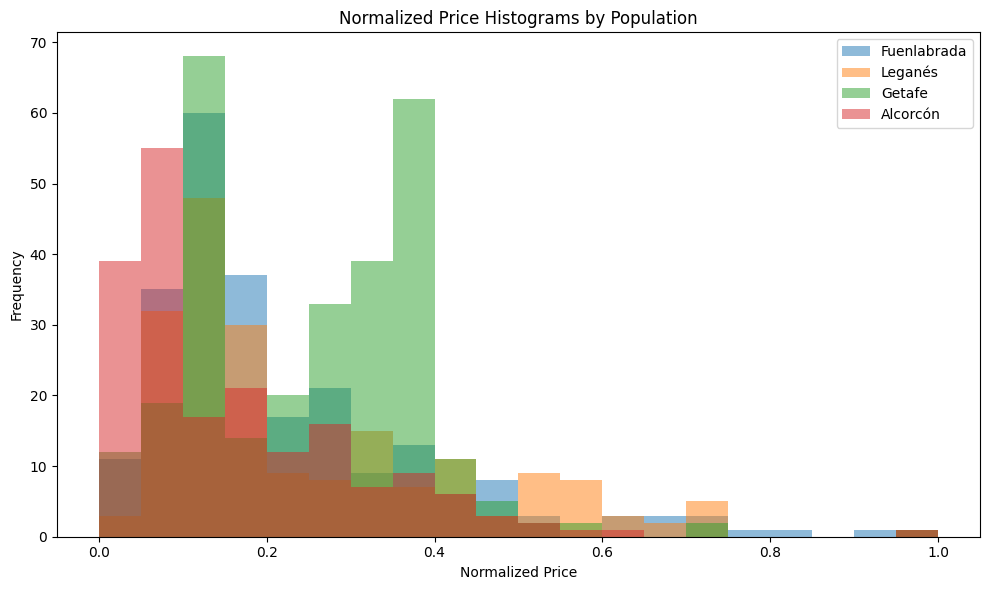

In [73]:

sb_subset["normalized_price"] = sb_subset.groupby("level5")["price"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

plt.figure(figsize=(10, 6))

for population in south_belt_populations:
    subset_population = sb_subset[sb_subset["level5"] == population]
    plt.hist(subset_population["normalized_price"], bins=20, alpha=0.5, label=population)

plt.title("Normalized Price Histograms by Population")
plt.xlabel("Normalized Price")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population #### (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [74]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [75]:

# Create a map object
map = Map(center=(40.4168, -3.7038), zoom=12, min_zoom=1, max_zoom=20, basemap=basemaps.Stamen.Terrain)


south_belt_populations = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

sb_subset = ds[ds["level5"].isin(south_belt_populations)] #data filtered ds

# Define a dictionary to map values to marker colors
color_dict = {"Fuenlabrada": "blue", "Leganés": "green", "Getafe": "red", "Alcorcón": "purple"}

# Create a boolean mask for filtering
mask = sb_subset['level5'].isin(south_belt_populations)

# Apply the mask to the DataFrame to create the subset
subset_df = sb_subset[mask]

###### Use list comprehension to create tuples from latitude and longitude columns####
lat_list = [float(lat.replace(',', '.')) for lat in subset_df['latitude']]
long_list = [float(long.replace(',', '.')) for long in subset_df['longitude']]

# Loop through the latitude and longitude lists and add markers to the map
for i, (lat, long) in enumerate(zip(lat_list, long_list)):
    south_belt_populations = subset_df.iloc[i]['level5']
    color = color_dict.get(south_belt_populations, "black")
    marker = Marker(location=(lat, long), icon=AwesomeIcon(name='house', marker_color=color), draggable=False)
    map.add_layer(marker)
# Display the map
map


Map(center=[40.4168, -3.7038], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

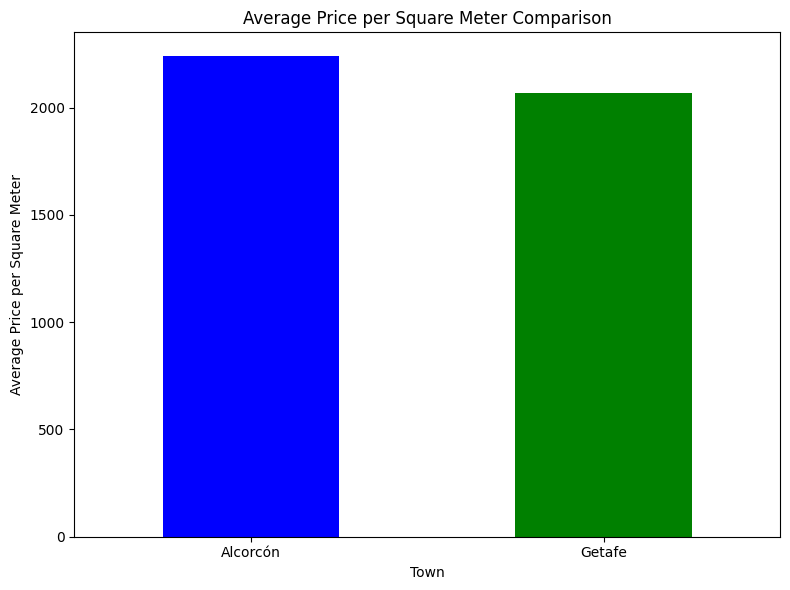

The bar plot shows that the average price per square meter in Getafe is 2,115€.
While the average price per square meter in Alcorcón is 1,955€. 
This means that the price per square meter is slightly higher in Getafe than in Alcorcón.


In [76]:

towns_GA = ["Getafe", "Alcorcón"]
subset_GA = ds[ds["level5"].isin(towns_GA )].copy()  


subset_GA.loc[:, "price_per_sqm"] = subset_GA["price"] / subset_GA["surface"]


average_price_per_sqm = subset_GA.groupby("level5")["price_per_sqm"].mean()


plt.figure(figsize=(8, 6))
average_price_per_sqm.plot(kind="bar", color=["blue", "green"])
plt.title("Average Price per Square Meter Comparison")
plt.xlabel("Town")
plt.ylabel("Average Price per Square Meter")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("The bar plot shows that the average price per square meter in Getafe is 2,115€.")
print("While the average price per square meter in Alcorcón is 1,955€. ")
print("This means that the price per square meter is slightly higher in Getafe than in Alcorcón.")


#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

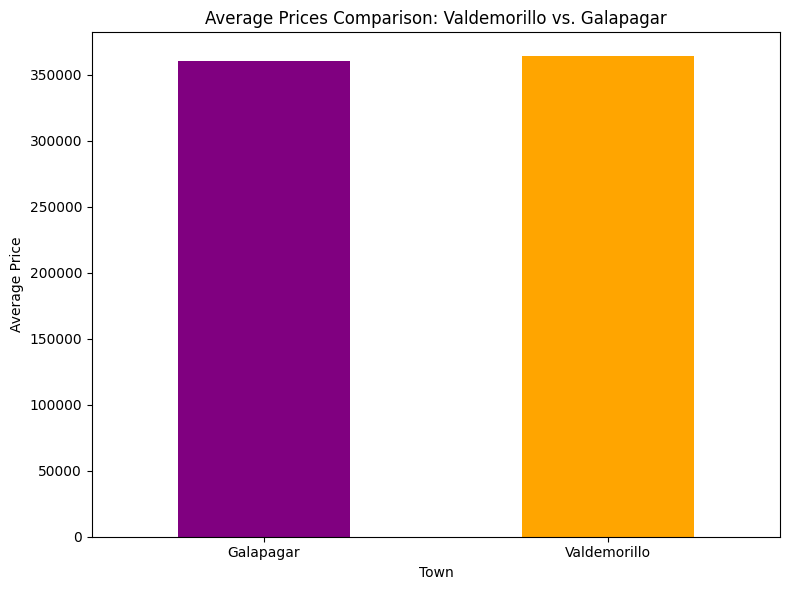

Average Price of Valdemorillo: 363860 €
Average Price of Galapagar: 360063 €
Is the average of 'Valdemorillo' and 'Galapagar' prices the same? No, the average price in Valdemorillo is higher.


In [77]:

towns_VG = ["Valdemorillo", "Galapagar"]
subset_VG = ds[ds["level5"].isin(towns_VG)].copy() 


average_prices = subset_VG.groupby("level5")["price"].mean()


plt.figure(figsize=(8, 6))
average_prices.plot(kind="bar", color=["purple", "orange"])
plt.title("Average Prices Comparison: Valdemorillo vs. Galapagar")
plt.xlabel("Town")
plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


valdemorillo_avg_price = int(average_prices["Valdemorillo"])
galapagar_avg_price = int(average_prices["Galapagar"])


if valdemorillo_avg_price == galapagar_avg_price:
    answer = "Yes, the average prices are the same."
else:
    bigger_town = "Valdemorillo" if valdemorillo_avg_price > galapagar_avg_price else "Galapagar"
    answer = f"No, the average price in {bigger_town} is higher."

print("Average Price of Valdemorillo:", valdemorillo_avg_price, "€")
print("Average Price of Galapagar:", galapagar_avg_price, "€")
print("Is the average of 'Valdemorillo' and 'Galapagar' prices the same?", answer)



#### What happens if we do the same analysis for price/m2 (★★☆) 

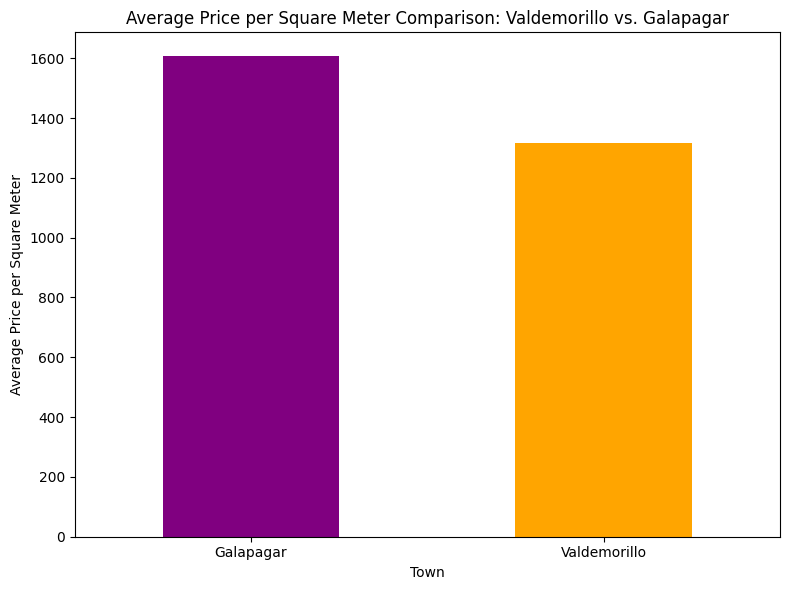

Average Price per Square Meter in Valdemorillo: 1317
Average Price per Square Meter in Galapagar: 1606
Is the average of 'Valdemorillo' and 'Galapagar' prices per square meter the same? No, the average price per square meter in Galapagar is higher.


In [78]:

subset_VG["price_per_sqm"] = subset_VG["price"] / subset_VG["surface"]
average_price_per_sqm = subset_VG.groupby("level5")["price_per_sqm"].mean()


plt.figure(figsize=(8, 6))
average_price_per_sqm.plot(kind="bar", color=["purple", "orange"])
plt.title("Average Price per Square Meter Comparison: Valdemorillo vs. Galapagar")
plt.xlabel("Town")
plt.ylabel("Average Price per Square Meter")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


valdemorillo_avg_price_per_sqm = int(average_price_per_sqm["Valdemorillo"])
galapagar_avg_price_per_sqm = int(average_price_per_sqm["Galapagar"])


if valdemorillo_avg_price_per_sqm == galapagar_avg_price_per_sqm:
    answer = "Yes, the average prices per square meter are the same."
else:
    bigger_town = "Valdemorillo" if valdemorillo_avg_price_per_sqm > galapagar_avg_price_per_sqm else "Galapagar"
    answer = f"No, the average price per square meter in {bigger_town} is higher."

print("Average Price per Square Meter in Valdemorillo:", valdemorillo_avg_price_per_sqm)
print("Average Price per Square Meter in Galapagar:", galapagar_avg_price_per_sqm)
print("Is the average of 'Valdemorillo' and 'Galapagar' prices per square meter the same?", answer)

#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

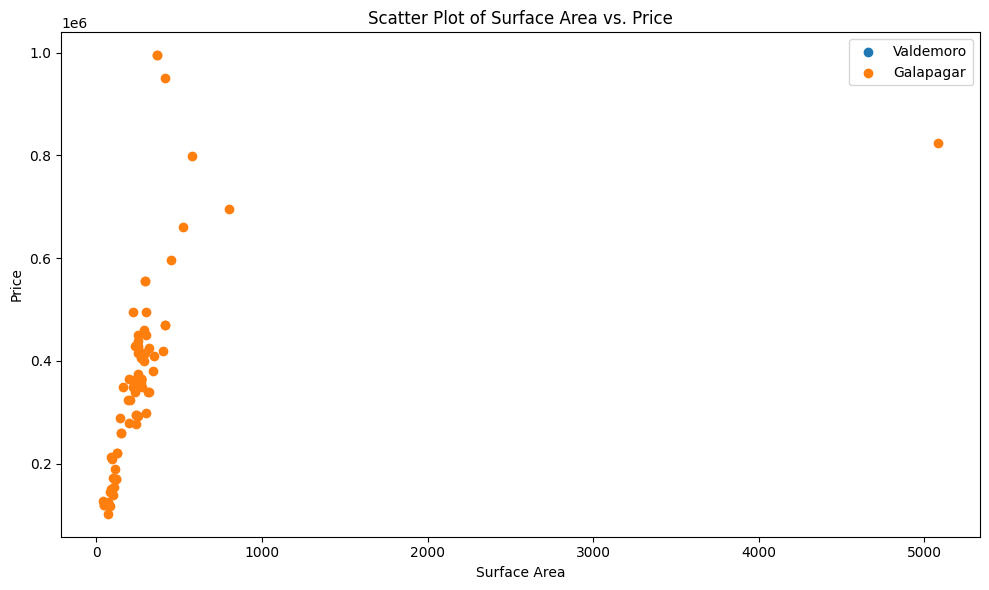

In conclusion, the analysis suggests a positive correlation between surface area and price for properties.
As property size increases, its price tends to rise. Correlation doesn't imply causation; other factors play a role.


In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(subset_VG[subset_VG["level5"] == "Valdemoro"]["surface"], subset_VG[subset_VG["level5"] == "Valdemoro"]["price"], label="Valdemoro")
plt.scatter(subset_VG[subset_VG["level5"] == "Galapagar"]["surface"], subset_VG[subset_VG["level5"] == "Galapagar"]["price"], label="Galapagar")
plt.title("Scatter Plot of Surface Area vs. Price")
plt.xlabel("Surface Area")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


conclusion = (
    "In conclusion, the analysis suggests a positive correlation between surface area and price for properties.\n"
    "As property size increases, its price tends to rise. Correlation doesn't imply causation; other factors play a role."
)

print(conclusion)




#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

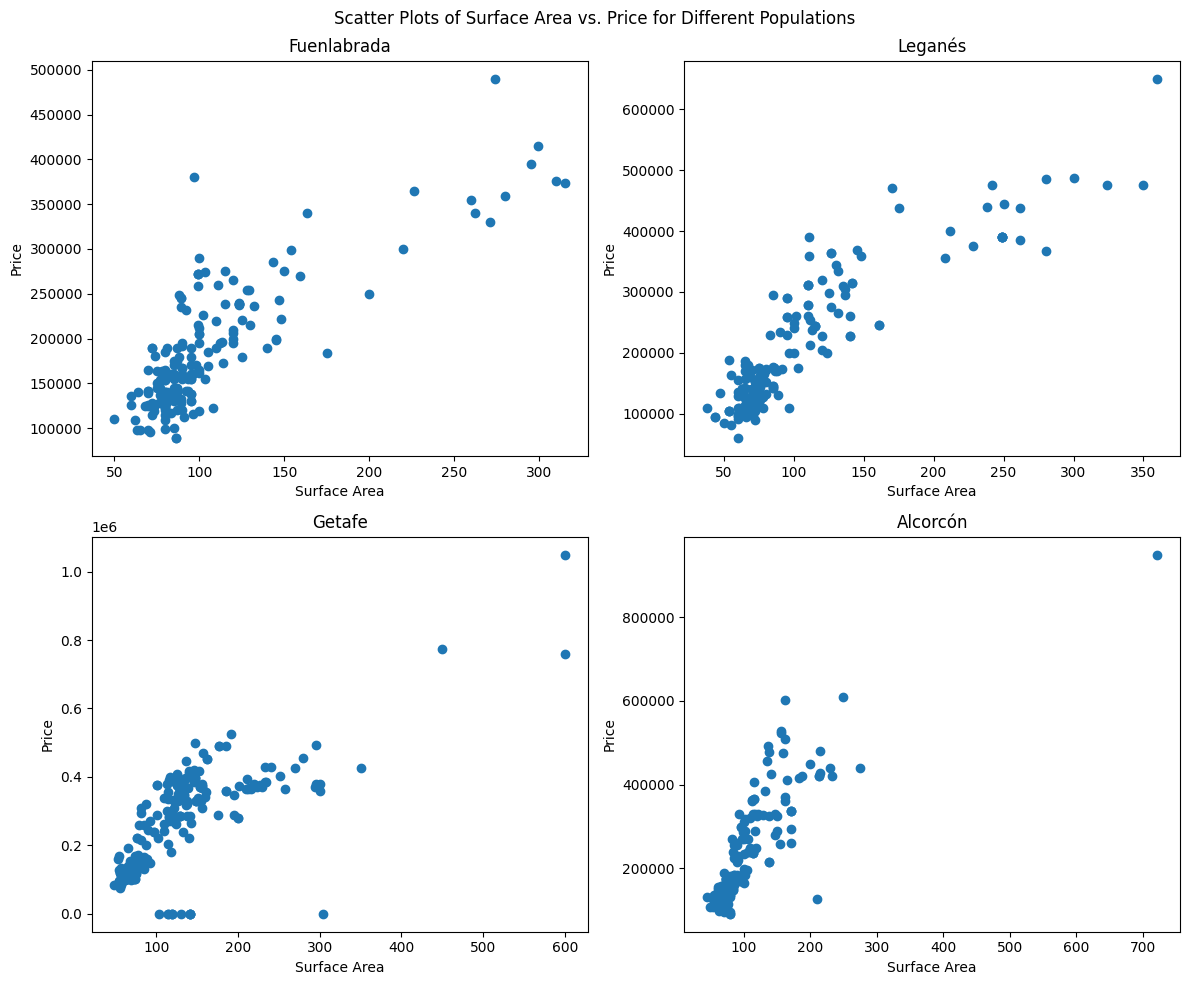

In [86]:
# 4 scatter plot for each population

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle("Scatter Plots of Surface Area vs. Price for Different Populations")


for i, population in enumerate(south_belt_populations):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    subset_population = sb_subset[sb_subset["level5"] == population]
    
    ax.scatter(subset_population["surface"], subset_population["price"])
    ax.set_title(population)
    ax.set_xlabel("Surface Area")
    ax.set_ylabel("Price")

plt.tight_layout()
plt.show()

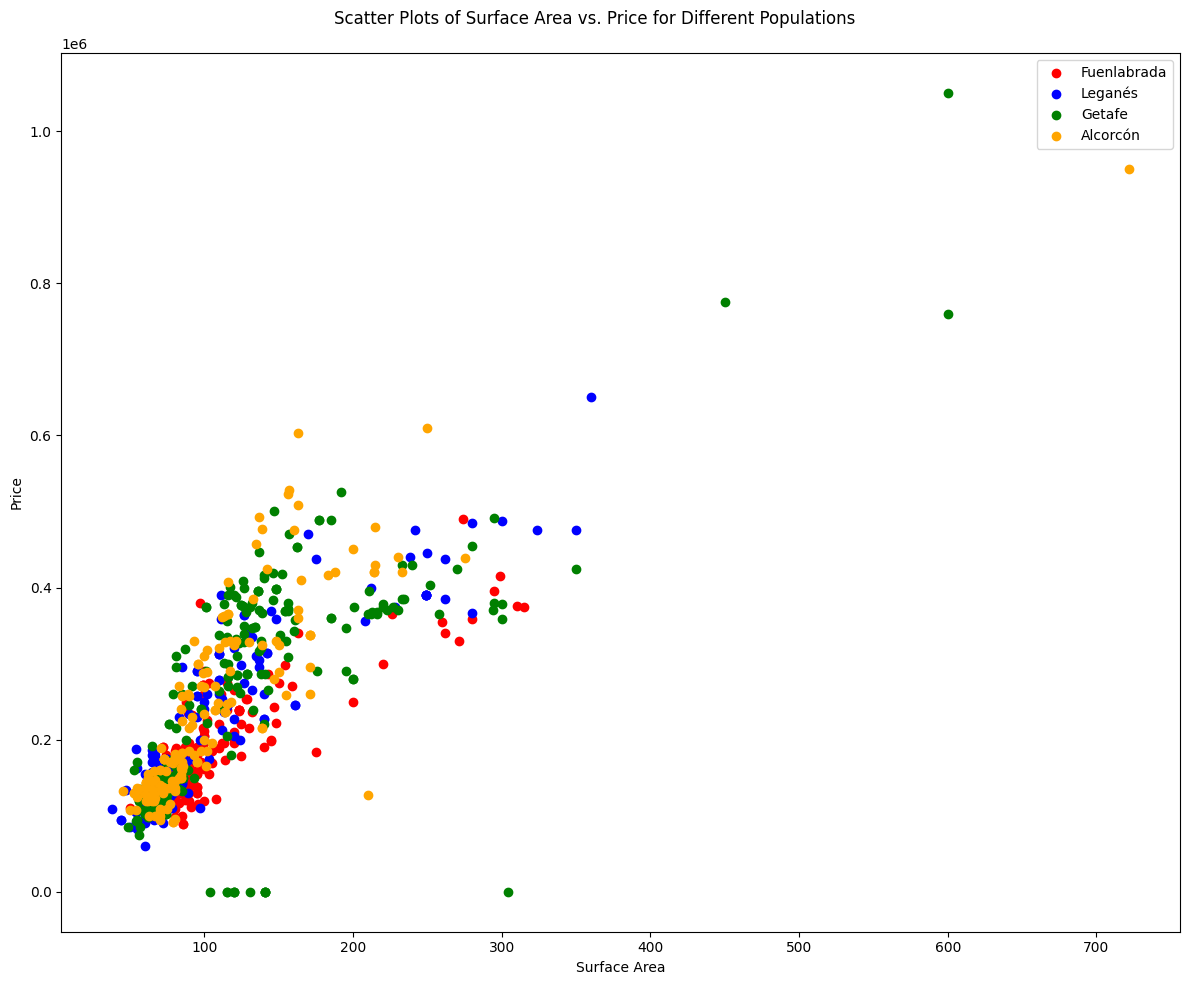

In [88]:

#Re-arranged in the same graph

fig, ax = plt.subplots(figsize=(12, 10))
fig.suptitle("Scatter Plots of Surface Area vs. Price for Different Populations")


colors = ['red', 'blue', 'green', 'orange']

for i, population in enumerate(south_belt_populations):
    subset_population = sb_subset[sb_subset["level5"] == population]
    
    
    ax.scatter(subset_population["surface"], subset_population["price"], color=colors[i], label=population)


ax.set_xlabel("Surface Area")
ax.set_ylabel("Price")
ax.legend()

plt.tight_layout()
plt.show()

#### How many  real estate agencies the dataset contains? (★★☆) 

In [82]:
num_agencies = ds['realEstate_name'].nunique()

print("Number of unique real estate agencies:", num_agencies)

Number of unique real estate agencies: 1821


#### What is the population (level 5) that contains the most houses? (★★☆) 

In [83]:
population_counts = ds['level5'].value_counts()


most_common_population = population_counts.idxmax()
num_houses_most_common = population_counts.max()

print("Population with the most houses:", most_common_population)
print("Number of houses in the most common population:", num_houses_most_common)

Population with the most houses:  Madrid Capital
Number of houses in the most common population: 6643
